The dataset I’m using here to train a car price prediction model was downloaded from Kaggle. It contains data about all the main features that contribute to the price of a car and to know Which variables are significant in predicting the price of a car
How well those variables describe the price of a car. So let’s start this task by importing the necessary Python libraries and the dataset:

In [1]:
# Importiang all necessary Libaries: Data Science Packages

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data with pandas
# Reading first 10 Rows of the data
df = pd.read_csv("C:/Users/csc/OneDrive/Desktop/data.csv", header=0)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Checking the shape of the data
df.shape

(11914, 16)

In [4]:
#Reading the name of the columns
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
# Checking the data types of the attributes
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
#getting information(like non-null count and datatypes) about all attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# Gives us count of missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [8]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [9]:
#descriptive statistics
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
#descriptive statistics for categorical columns
df.describe(include=['object'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


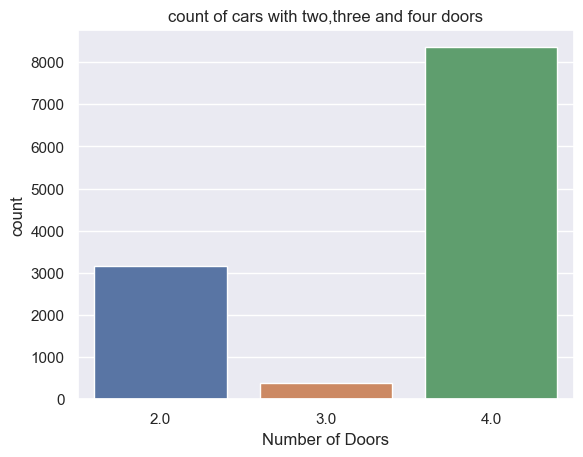

In [11]:
#countplot for number of doors
sns.set_theme(style="darkgrid")
sns.countplot(x ='Number of Doors', data = df)
plt.title('count of cars with two,three and four doors')
# Show the plot
plt.show()

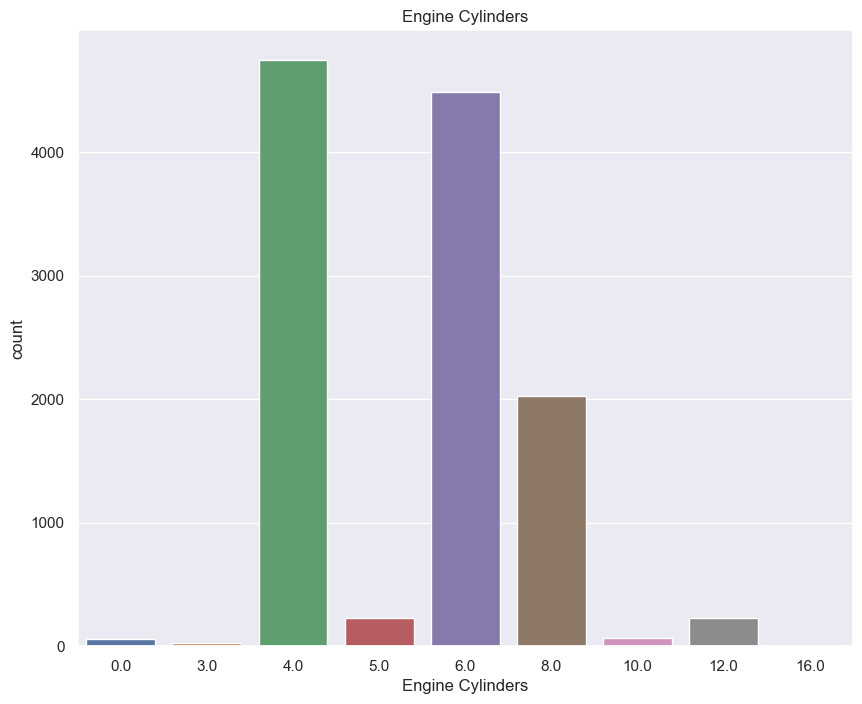

In [12]:
#countplot for no. of engine cylinders
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x ='Engine Cylinders', data = df)
plt.title('Engine Cylinders')
plt.show()

(array([1.695e+03, 4.834e+03, 3.489e+03, 1.057e+03, 4.070e+02, 2.660e+02,
        8.500e+01, 9.000e+00, 0.000e+00, 3.000e+00]),
 array([  55. ,  149.6,  244.2,  338.8,  433.4,  528. ,  622.6,  717.2,
         811.8,  906.4, 1001. ]),
 <BarContainer object of 10 artists>)

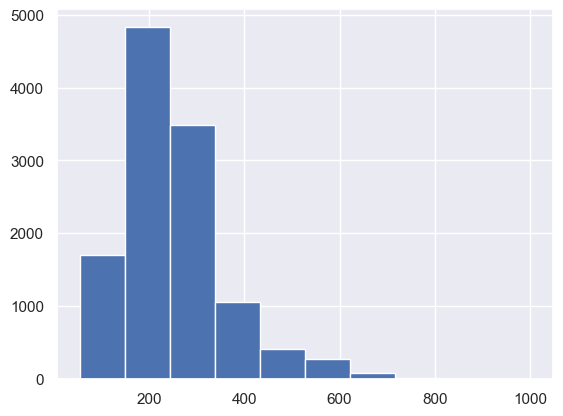

In [13]:
#histogram plot for engine horsepower(tells us how frequent it appeared)
plt.hist(df['Engine HP'])

(array([7.116e+03, 4.504e+03, 1.820e+02, 4.600e+01, 0.000e+00, 3.000e+00,
        1.500e+01, 9.000e+00, 9.000e+00, 3.000e+01]),
 array([  7.,  20.,  33.,  46.,  59.,  72.,  85.,  98., 111., 124., 137.]),
 <BarContainer object of 10 artists>)

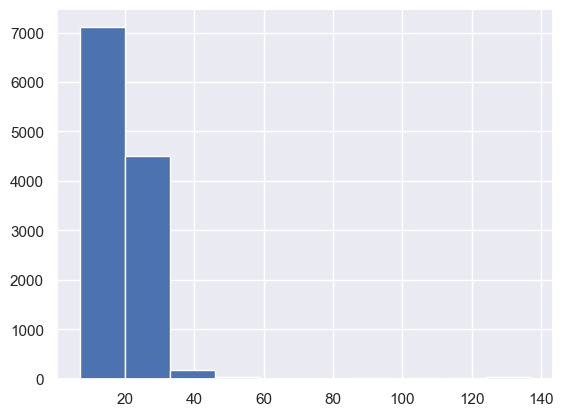

In [14]:
#histogram plot for city mpg
plt.hist(df['city mpg'])

<AxesSubplot:title={'center':'Manufacturer’s Suggested Retail Price Plot'}, xlabel='MSRP', ylabel='Density'>

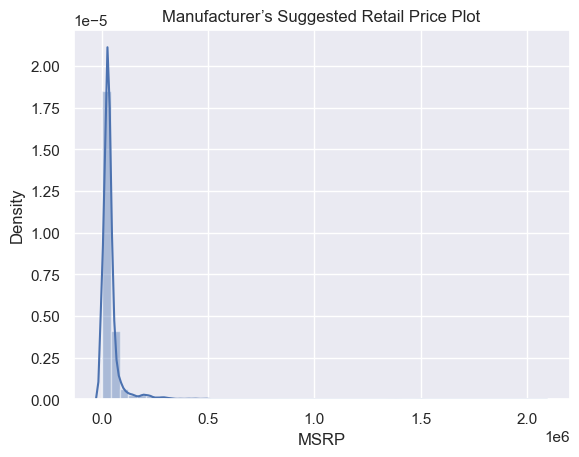

In [15]:
#Distribution plot for MSRP
plt.title('Manufacturer’s Suggested Retail Price Plot')
sns.distplot(df.MSRP)

imputing missing values with median(from the above visualization, we came to know that data is right skewed) and mode

In [16]:
df['Engine HP'].median()
df['Engine HP'].fillna(value = df['Engine HP'].median(), inplace = True)

In [17]:
df['Engine Cylinders'].median()
df['Engine Cylinders'].fillna(value = df['Engine Cylinders'].median(), inplace = True)

In [18]:
df['Number of Doors'].median()
df['Number of Doors'].fillna(value = df['Number of Doors'].median(), inplace = True)

In [19]:
df['Engine Fuel Type'].mode()
df['Engine Fuel Type'].fillna(value = df['Engine Fuel Type'].mode(), inplace = True)

In [20]:
# Gives us count of missing values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [21]:
# Checking the data types of the attributes
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [22]:
# Identifying unique values 
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

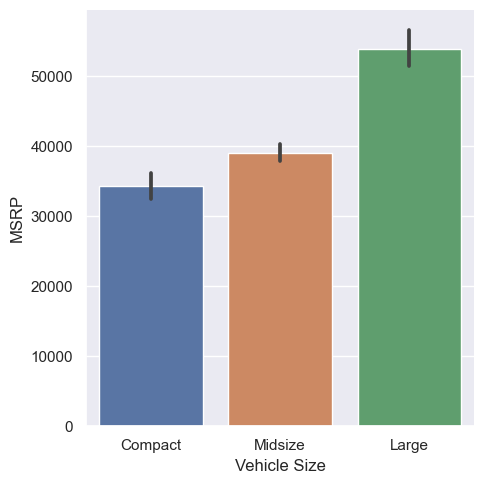

In [23]:
sns.catplot(x="Vehicle Size", y="MSRP", kind="bar", data=df)

to convert categorical columns into numerical

In [24]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Make']= label_encoder.fit_transform(df['Make'])
df['Engine Fuel Type']= label_encoder.fit_transform(df['Engine Fuel Type'])
df['Transmission Type']= label_encoder.fit_transform(df['Transmission Type'])
df['Driven_Wheels']= label_encoder.fit_transform(df['Driven_Wheels'])
df['Vehicle Size']= label_encoder.fit_transform(df['Vehicle Size'])
df['Vehicle Style']= label_encoder.fit_transform(df['Vehicle Style'])

In [25]:
df.dtypes

Make                   int32
Model                 object
Year                   int64
Engine Fuel Type       int32
Engine HP            float64
Engine Cylinders     float64
Transmission Type      int32
Driven_Wheels          int32
Number of Doors      float64
Market Category       object
Vehicle Size           int32
Vehicle Style          int32
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [26]:
# calculating the correlation of complete dataset

corr = df.corr()
corr

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,-0.013936,0.116000,-0.226445,-0.263837,0.045022,-0.035689,0.057339,-0.102262,-0.057137,0.133242,0.150862,-0.297651,-0.107331
Year,-0.013936,1.000000,-0.254002,0.350573,-0.041459,-0.361553,-0.183914,0.263946,0.102098,-0.067713,0.258240,0.198171,0.073049,0.227590
Engine Fuel Type,0.116000,-0.254002,1.000000,-0.194916,-0.076684,0.123393,0.019074,-0.004703,-0.048840,-0.044001,-0.171581,-0.184774,-0.059557,-0.114816
Engine HP,-0.226445,0.350573,-0.194916,1.000000,0.767037,-0.238357,-0.035007,-0.102934,0.207912,0.013490,-0.359457,-0.353894,0.036823,0.661402
Engine Cylinders,-0.263837,-0.041459,-0.076684,0.767037,1.000000,-0.164482,0.087577,-0.140026,0.195037,0.032725,-0.600947,-0.565124,0.040815,0.531139
Transmission Type,0.045022,-0.361553,0.123393,-0.238357,-0.164482,1.000000,0.173338,-0.335432,-0.305262,-0.035039,0.044252,0.048807,0.010095,-0.181742
Driven_Wheels,-0.035689,-0.183914,0.019074,-0.035007,0.087577,0.173338,1.000000,-0.253983,-0.132160,0.099985,-0.003503,-0.011236,0.026987,-0.037943
Number of Doors,0.057339,0.263946,-0.004703,-0.102934,-0.140026,-0.335432,-0.253983,1.000000,0.267075,0.202841,0.118925,0.121206,-0.048251,-0.126081
Vehicle Size,-0.102262,0.102098,-0.048840,0.207912,0.195037,-0.305262,-0.132160,0.267075,1.000000,0.166140,-0.111000,-0.142728,-0.003995,0.037162
Vehicle Style,-0.057137,-0.067713,-0.044001,0.013490,0.032725,-0.035039,0.099985,0.202841,0.166140,1.000000,0.027447,-0.041795,0.036024,-0.010193


In [27]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1 Series M,2011,8,335.0,6.0,3,3,2.0,"Factory Tuner,Luxury,High-Performance",0,8,26,19,3916,46135
1,4,1 Series,2011,8,300.0,6.0,3,3,2.0,"Luxury,Performance",0,6,28,19,3916,40650
2,4,1 Series,2011,8,300.0,6.0,3,3,2.0,"Luxury,High-Performance",0,8,28,20,3916,36350
3,4,1 Series,2011,8,230.0,6.0,3,3,2.0,"Luxury,Performance",0,8,28,18,3916,29450
4,4,1 Series,2011,8,230.0,6.0,3,3,2.0,Luxury,0,6,28,18,3916,34500


<AxesSubplot:>

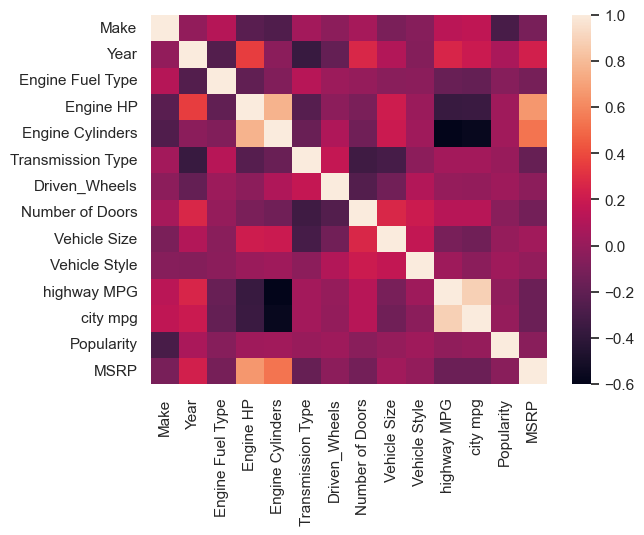

In [28]:
# Visulaizing the heatmap of complete dataset

sns.heatmap(corr)

In [29]:
df1 = pd.read_csv("C:/Users/csc/OneDrive/Desktop/data.csv", header=0)

In [30]:
df1["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [31]:
df["Engine Fuel Type"].unique()

array([ 8,  9,  7,  4,  0,  1,  2,  6,  3,  5, 10])

<Figure size 3000x800 with 0 Axes>

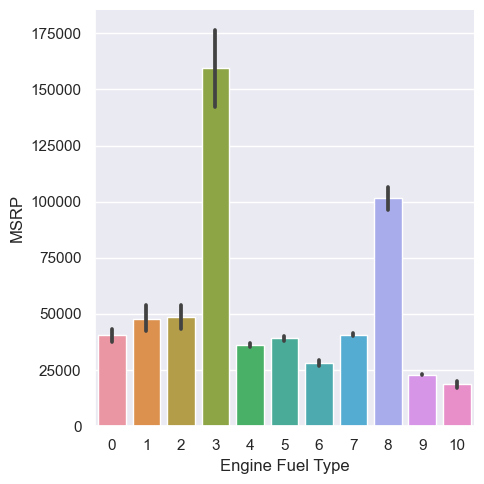

In [32]:
#engine fule type v/s MSRP
plt.figure(figsize=(30,8))
sns.set_theme(style="darkgrid")
sns.catplot(x="Engine Fuel Type", y="MSRP", kind="bar", data=df)

In [33]:
df1["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [34]:
df["Transmission Type"].unique()

array([3, 1, 0, 2, 4])

<Figure size 3000x800 with 0 Axes>

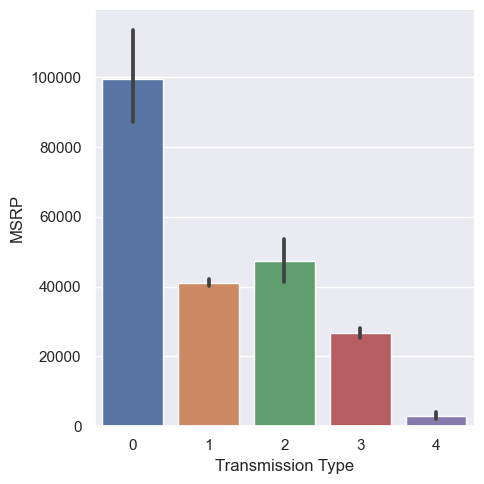

In [35]:
# transmission type v/s MSRP
plt.figure(figsize=(30,8))
sns.set_theme(style="darkgrid")
sns.catplot(x="Transmission Type", y="MSRP", kind="bar", data=df)

In [36]:
df1["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [37]:
df["Vehicle Style"].unique()

array([ 8,  6, 14, 15,  2,  0,  3, 11,  4,  9, 13, 10,  1,  5,  7, 12])

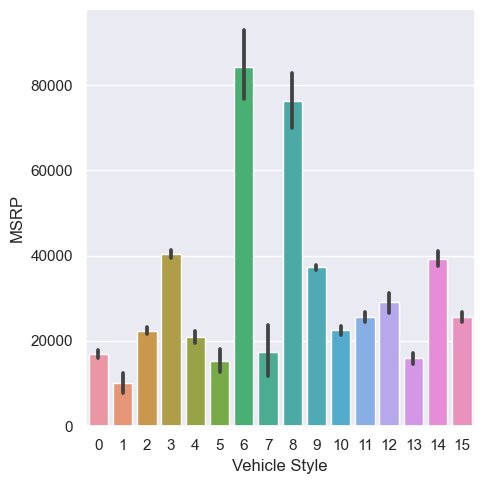

In [38]:
sns.catplot(x="Vehicle Style", y="MSRP", kind="bar", data=df)

In [39]:
#dropping the categorical column because it has more unique values
df= df.drop(['Model'], axis=1)

In [40]:
#dropping other categorical column because it has more missing values
df= df.drop(['Market Category'], axis=1)

In [41]:
df.head(5)

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,2011,8,335.0,6.0,3,3,2.0,0,8,26,19,3916,46135
1,4,2011,8,300.0,6.0,3,3,2.0,0,6,28,19,3916,40650
2,4,2011,8,300.0,6.0,3,3,2.0,0,8,28,20,3916,36350
3,4,2011,8,230.0,6.0,3,3,2.0,0,8,28,18,3916,29450
4,4,2011,8,230.0,6.0,3,3,2.0,0,6,28,18,3916,34500


importing necessary libraries to build model

In [42]:
#import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [43]:
# dropping the target variable
X = df.drop('MSRP', axis=1)
y = df['MSRP']

In [44]:
#feature selection to decide root nodes and interior nodes
f_selector = SelectKBest(f_regression, k=13)
X_kbest = f_selector.fit_transform(X, y)

In [45]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.30)

to find maximum depth of tree

In [46]:
depth = [];
for i in range(1,20):
    dt_reg = DecisionTreeRegressor(max_features=f_selector.get_support().sum(), random_state=1, max_depth = i)
    dt_reg.fit(X_train, y_train)
    y_pred = dt_reg.predict(X_test)
    depth.append(r2_score(y_test,y_pred))
    print("For max depth = ",i, " : ",r2_score(y_test,y_pred))

For max depth =  1  :  0.3632895246364364
For max depth =  2  :  0.6848908938429458
For max depth =  3  :  0.7374754567769433
For max depth =  4  :  0.8103892484175546
For max depth =  5  :  0.83716962639932
For max depth =  6  :  0.8318840112554727
For max depth =  7  :  0.9271015366025676
For max depth =  8  :  0.9291737151244076
For max depth =  9  :  0.9319054150259215
For max depth =  10  :  0.9300938442797186
For max depth =  11  :  0.9234101165097643
For max depth =  12  :  0.9225536547418705
For max depth =  13  :  0.9290050417346055
For max depth =  14  :  0.9390800059947695
For max depth =  15  :  0.8616736728357828
For max depth =  16  :  0.8645452325845511
For max depth =  17  :  0.9313820257083689
For max depth =  18  :  0.8571959874546111
For max depth =  19  :  0.9400472660397537


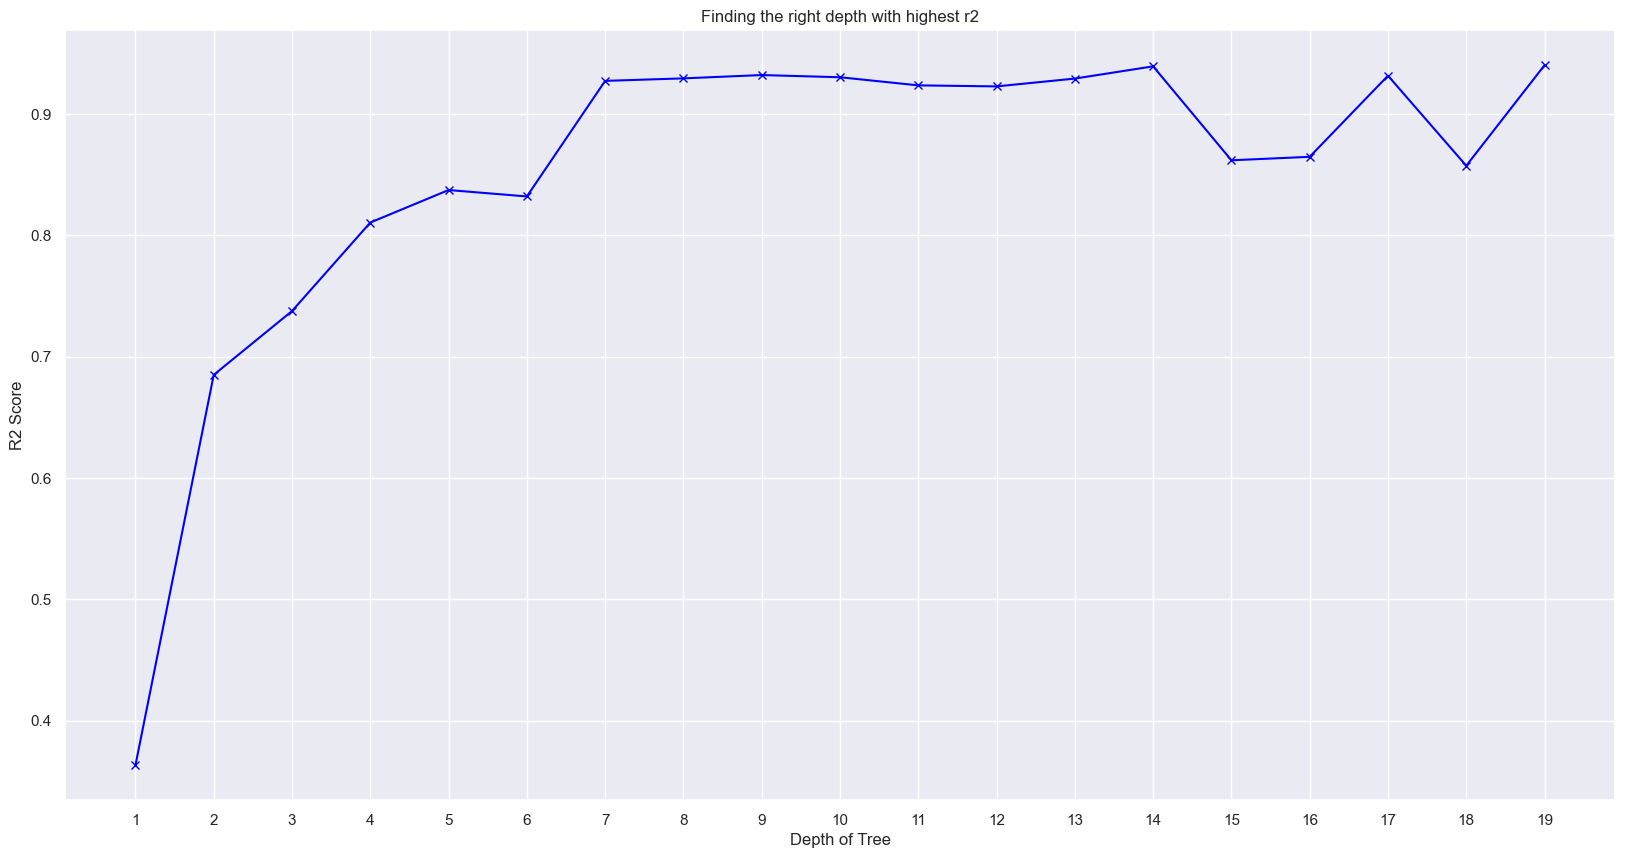

In [47]:
# finding best max depth
plt.figure(figsize=(20,10))
plt.plot(range(1,20),depth,color="blue", marker = "x")
plt.xlabel("Depth of Tree")
plt.ylabel("R2 Score")
plt.title("Finding the right depth with highest r2")
plt.xticks(range(1,20))
plt.show()

In [48]:
#max_depth
dt_reg = DecisionTreeRegressor(max_features=f_selector.get_support().sum(), random_state=1, max_depth = 9)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
print('r2 score:',r2_score(y_test,y_pred))

r2 score: 0.9319054150259215


In [49]:
# Checking feature importance in the model
dt_reg.feature_importances_

array([5.75748133e-03, 5.55909213e-02, 6.75133776e-03, 2.51410378e-01,
       5.45453684e-01, 7.42354058e-03, 6.74295472e-05, 5.15213120e-03,
       6.02317439e-03, 1.93104655e-02, 1.27389730e-02, 3.04298643e-02,
       5.38906195e-02])

<AxesSubplot:>

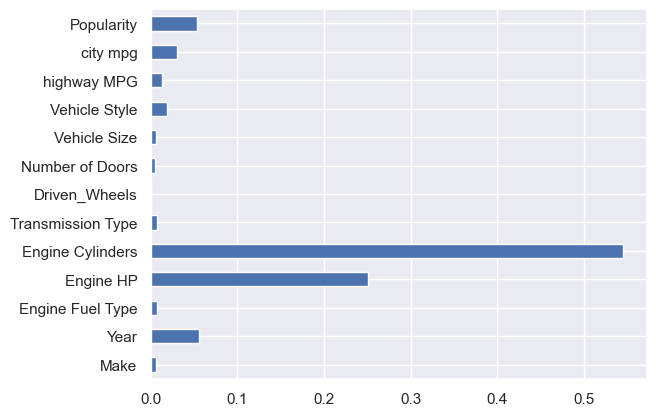

In [50]:
# Visualizing feature importance
(pd.Series(dt_reg.feature_importances_, index=X.columns).plot(kind='barh'))